In [18]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt


[Dataset yang digunakan pada Project 2](https://github.com/KimathiNewton/Telco-Customer-Churn/blob/master/Datasets/telco_churn.csv?plain=1)

## Data Prep

In [2]:
data = pd.read_csv("Data_Project_Modsur2.csv")

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [9]:
data.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5043,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5038,5042
unique,5043,2,4,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4870,4
top,7590-VHVEG,Male,False,False,False,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,20.450000762939453,False
freq,1,2559,2525,1538,2070,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,5,2219


In [10]:
data.describe()

,Unnamed: 0,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,1305.651993,32.576641,65.090214
std,801.484415,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,630.000000,9.000000,35.775000
50%,1260.000000,29.000000,70.550003
75%,1890.500000,56.000000,90.050003
max,2999.000000,72.000000,118.650002


In [8]:
print(data.columns)

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [11]:
data.isna().sum()

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


Berdasarkan permintaan dari soal yang diberikan, cuman diminta variabel dari tenure, Churn, Contract, InternetService, SeniorCitizen, PaymentMethod.

Tapi ini kayaknya masih gak tentu soalnya kalo dari deskripsi soal bagian **0.** diminta deskripsi data.

Untuk saat ini, mungkin pake yang diminta di file project dulu aja.

In [52]:
df = data[['tenure', 'Churn', 'Contract', 'InternetService', 'SeniorCitizen', 'PaymentMethod']]
type(df)

pandas.core.frame.DataFrame

In [30]:
df.head()

,tenure,Churn,Contract,InternetService,SeniorCitizen,PaymentMethod
0,1,False,Month-to-month,DSL,False,Electronic check
1,34,False,One year,DSL,False,Mailed check
2,2,True,Month-to-month,DSL,False,Mailed check
3,45,False,One year,DSL,False,Bank transfer (automatic)
4,2,True,Month-to-month,Fiber optic,False,Electronic check


In [15]:
df.describe(include='object')

,Churn,Contract,InternetService,SeniorCitizen,PaymentMethod
count,5042,5043,5043,5043,5043
unique,4,3,3,4,4
top,False,Month-to-month,Fiber optic,False,Electronic check
freq,2219,2744,2248,2525,1700


In [16]:
df.describe(exclude='object')

,tenure
count,5043.000000
mean,32.576641
std,24.529807
min,0.000000
25%,9.000000
50%,29.000000
75%,56.000000
max,72.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tenure           5043 non-null   int64 
 1   Churn            5042 non-null   object
 2   Contract         5043 non-null   object
 3   InternetService  5043 non-null   object
 4   SeniorCitizen    5043 non-null   object
 5   PaymentMethod    5043 non-null   object
dtypes: int64(1), object(5)
memory usage: 236.5+ KB


In [46]:
df.isna().sum()

tenure             0
Churn              1
Contract           0
InternetService    0
SeniorCitizen      0
PaymentMethod      0
dtype: int64

Kelihatannya gak ada kolom yang memiliki *missing values*. Gak perlu ada imputasi, gak perlu penghapusan observasi pada data.

Dari deskripsi soal Project, *tenure* adalah kondisi "*Survival*" yang diminta. Jadi jika $t$ yaitu waktu tenor (*tenure*) seseorang berlangganan TelcoX dalam bulan, maka *Churn* adalah kondisi di mana individu tersebut berhenti berlangganan, yaitu dikategorikan sebagai *True* jika sudah berhenti dan *False* jika belum berhenti. Kondisi *False* adalah observasi yang **tersensor**.

## EDA

In [20]:
df.head(10)

,tenure,Churn,Contract,InternetService,SeniorCitizen,PaymentMethod
0,1,False,Month-to-month,DSL,False,Electronic check
1,34,False,One year,DSL,False,Mailed check
2,2,True,Month-to-month,DSL,False,Mailed check
3,45,False,One year,DSL,False,Bank transfer (automatic)
4,2,True,Month-to-month,Fiber optic,False,Electronic check
5,8,True,Month-to-month,Fiber optic,False,Electronic check
6,22,False,Month-to-month,Fiber optic,False,Credit card (automatic)
7,10,False,Month-to-month,DSL,False,Mailed check
8,28,True,Month-to-month,Fiber optic,False,Electronic check
9,62,False,One year,DSL,False,Bank transfer (automatic)


<Axes: xlabel='tenure', ylabel='Count'>

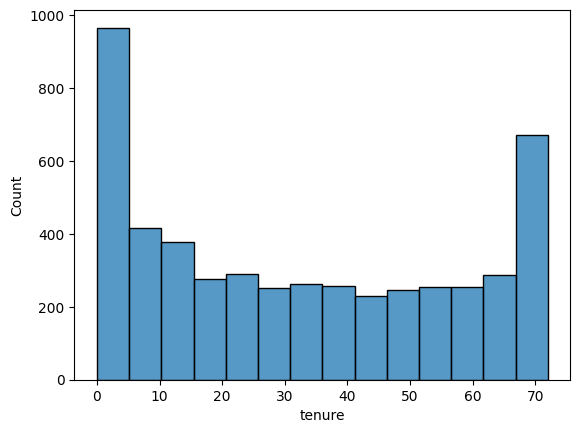

In [53]:
# Histogram distribusi tenure
sns.histplot(
    data=df["tenure"],
    
)

<Axes: xlabel='Churn', ylabel='Count'>

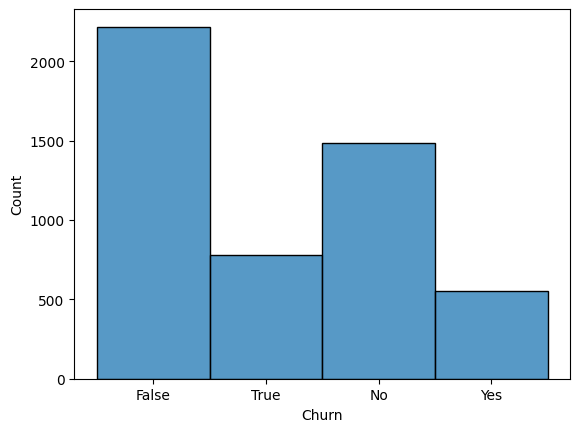

In [54]:
# Distribusi kondisi Churn
sns.histplot(
    df['Churn']
)

True = Yes dan False = No

Di sini dilakukan label encoding

In [45]:
print(df['Churn'].unique())

['False' 'True' nan 'No' 'Yes']


In [56]:
df['ChurnEncode'] = df['Churn'].replace({
    "True": "Yes", "False": "No"
}).fillna('No')

C:\Users\fasya\AppData\Local\Temp\ipykernel_15040\3581718449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChurnEncode'] = df['Churn'].replace({


In [49]:
df.head()

,tenure,Churn,Contract,InternetService,SeniorCitizen,PaymentMethod,ChurnEncode
0,1,False,Month-to-month,DSL,False,Electronic check,0
1,34,False,One year,DSL,False,Mailed check,0
2,2,True,Month-to-month,DSL,False,Mailed check,1
3,45,False,One year,DSL,False,Bank transfer (automatic),0
4,2,True,Month-to-month,Fiber optic,False,Electronic check,1


<Axes: xlabel='ChurnEncode', ylabel='Count'>

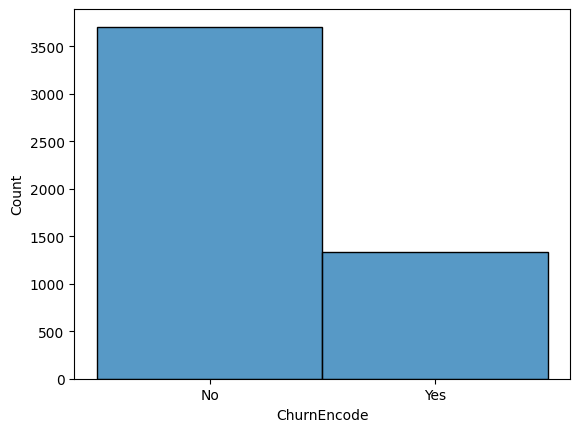

In [57]:
sns.histplot(
    df['ChurnEncode']
)

Kelihatannya unblanced, tapi memang pas kemaren coba Kaplan-Meier jelek sih plotnya.